# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import statsmodels.formula.api as smf

In [2]:
tips = load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


<AxesSubplot:xlabel='net_bill', ylabel='tip'>

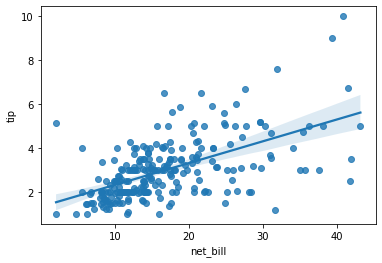

In [3]:
sns.regplot(data=tips, x='net_bill', y='tip')

In [4]:
reg_a = smf.ols('tip ~ net_bill', data = tips).fit()
reg_a.params

Intercept    1.330698
net_bill     0.099334
dtype: float64

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

<AxesSubplot:xlabel='net_bill', ylabel='tip_pct'>

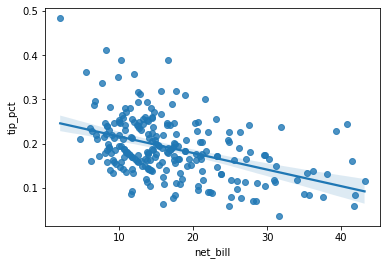

In [5]:
tips = tips[tips['tip_pct']<.5]
sns.regplot(data=tips, x='net_bill', y='tip_pct')

In [6]:
reg_b = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg_b.params

Intercept    0.253815
net_bill    -0.003735
dtype: float64

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$ s?

A regressão de gorjeta em função da conta líquida tem $\alpha$ positivo, enquanto que a regressão da porcentagem de gorjeta em função de conta líquida tem $\alpha$ negativo. Podemos comparar os $R^2$ diretamente porque esta medida se trata da proporção em que a oscilação da variável resposta é explicada pelo modelo.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [8]:
pred_pct = reg_b.fittedvalues

In [9]:
pred_tip = pred_pct * tips['net_bill']
pred_tip

0      3.102114
1      1.921686
2      3.299055
3      3.620296
4      3.680906
         ...   
239    3.870744
240    4.022759
241    3.650452
242    3.114183
243    3.075078
Length: 242, dtype: float64

In [10]:
reg_b.rsquared

0.18946394629203056

In [11]:
reg_a.rsquared

0.3325407312323707

O $R^2$ do modelo A é maior que o do modelo B, portanto, o valor da conta é um melhor preditor da gorjeta absoluta do que sua porcentagem em relação à conta.